In [59]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

all_player_data = pd.read_csv('Fortnite_players_stats.csv')
all_player_data.head(10)

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389,4702684,5584,...,75787.0,117967.0,101589.0,170.0,118.0,5.78,26.8,634.0,2682.0,2865.0
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732,4065613,4141,...,117327.0,150439.0,151358.0,229.0,190.0,8.20,18.2,1259.0,8442.0,4206.0
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171,1137279,1390,...,76065.0,86684.0,452136.0,1180.0,818.0,11.12,32.9,3583.0,26726.0,12273.0
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453,5326457,2249,...,6892.0,80016.0,1748407.0,190.0,246.0,2.33,5.4,3539.0,7787.0,33224.0
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245,3692623,5743,...,46068.0,81424.0,556721.0,824.0,600.0,14.99,53.3,1546.0,10826.0,12019.0
5,Twitch Kayotica,2919037,1310,3.23,9.7,13438,39131,96777,1298412,1242,...,40507.0,89472.0,294971.0,184.0,185.0,4.81,11.7,1566.0,6654.0,8296.0
6,FaZe Replays,2389537,1454,3.84,7.8,18670,66161,76258,2508015,1935,...,40730.0,69693.0,383002.0,274.0,259.0,4.49,7.4,3718.0,15447.0,12634.0
7,NiteGamerYT 190k,15872,6,0.47,1.4,429,200,739,6438735,5449,...,6803.0,30012.0,370497.0,185.0,267.0,2.67,8.2,2263.0,5541.0,12625.0
8,ᴮᵒˢˢン,6772116,6480,1.39,32.6,19864,18610,283835,118705,65,...,1238.0,19419.0,827372.0,118.0,116.0,2.01,3.8,3067.0,5937.0,19174.0
9,CIUPEA 144.HZ,54479,9,0.61,0.5,1938,1174,2441,5873450,1250,...,6695.0,51058.0,440353.0,97.0,199.0,1.09,3.2,3048.0,3205.0,17273.0


In [49]:
solo_player_data = all_player_data[['Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio', 'Solo matches', 'Solo kills', 'Solo minutesPlayed']]

print(solo_player_data.info())
solo_player_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Solo score          1435 non-null   int64  
 1   Solo top1           1435 non-null   int64  
 2   Solo kd             1435 non-null   float64
 3   Solo winRatio       1435 non-null   float64
 4   Solo matches        1435 non-null   int64  
 5   Solo kills          1435 non-null   int64  
 6   Solo minutesPlayed  1435 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 78.6 KB
None


,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,2476763,1828,4.37,18.0,10150,36328,81389
1,439562,1694,8.71,29.1,5817,35895,12732
2,4519465,4582,9.60,34.0,13488,85481,122171
3,752869,121,0.84,3.3,3687,3005,32453
4,1136282,1327,6.32,30.0,4429,19591,36245
5,2919037,1310,3.23,9.7,13438,39131,96777
6,2389537,1454,3.84,7.8,18670,66161,76258
7,15872,6,0.47,1.4,429,200,739
8,6772116,6480,1.39,32.6,19864,18610,283835
9,54479,9,0.61,0.5,1938,1174,2441


In [50]:
solo_player_data.describe().round(2)

,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
count,1435.0,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00
mean,1088202.4,328.91,1.82,4.85,6911.06,11781.84,43517.14
std,887263.9,529.19,1.16,5.33,5408.22,11417.34,36314.88
min,4453.0,0.00,0.08,0.00,30.00,28.00,210.00
25%,435517.0,65.50,1.05,1.60,2875.00,3861.00,16922.00
50%,907001.0,162.00,1.48,2.90,5728.00,8452.00,35762.00
75%,1506555.0,366.00,2.20,6.10,9585.00,15993.00,59471.00
max,6772116.0,6480.00,9.60,44.10,36487.00,89023.00,283835.00


'Solo score'

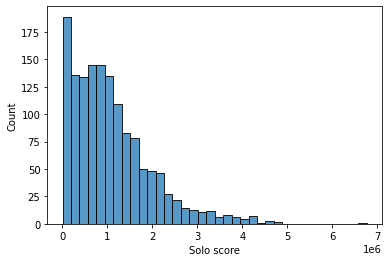

In [54]:
sns.histplot(data=solo_player_data, x='Solo score')


Need to remove outliers from data set

In [69]:
solo_player_data = solo_player_data[(np.abs(stats.zscore(solo_player_data)) < 3).all(axis=1)]

solo_player_data.head(10)


,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
3,752869,121,0.84,3.3,3687,3005,32453
7,15872,6,0.47,1.4,429,200,739
9,54479,9,0.61,0.5,1938,1174,2441
12,1665575,535,2.30,5.0,10596,23161,55978
13,478280,25,0.70,1.0,2581,1785,21679
15,2469301,612,1.42,4.5,13464,18301,106526
16,551309,62,1.59,2.5,2527,3930,22014
18,212388,34,1.03,2.3,1491,1505,8945
19,228620,79,1.03,2.4,3269,3281,8903
20,262750,91,1.68,3.2,2853,4641,10758


## Visualize data distributions

Visualizing the distributions of the player data could help prove that a player skill curve exists in the game. If the data shows a player skill curve exists then we can use this data organize players into skill groups based on their statistics.

We will also want to find if there is any correlation between variables in the data set. Correlated variables may help predict player skill level to a higher degree of confidence.

Text(0.5, 1.0, 'Distribution of Solo Minutes Played Among Players')

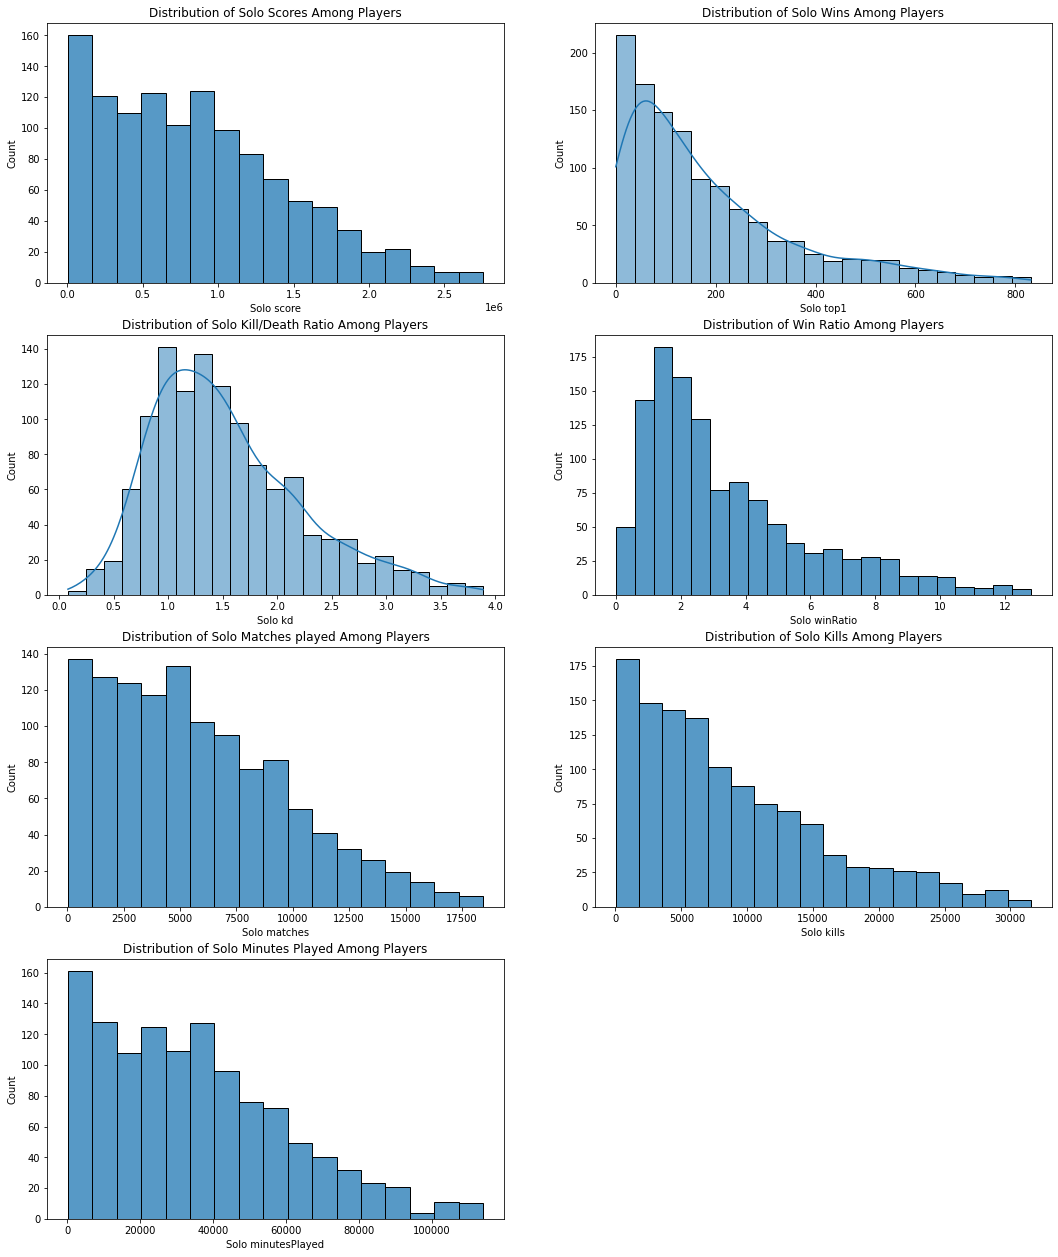

In [93]:
plt.figure(figsize=(18,22))
plt.subplot(421)
sns.histplot(data=solo_player_data, x='Solo score')
plt.title('Distribution of Solo Scores Among Players')
plt.subplot(422)
sns.histplot(data=solo_player_data, x='Solo top1', kde=True)
plt.title('Distribution of Solo Wins Among Players')
plt.subplot(423)
sns.histplot(data=solo_player_data, x='Solo kd', kde=True)
plt.title('Distribution of Solo Kill/Death Ratio Among Players')
plt.subplot(424)
sns.histplot(data=solo_player_data, x='Solo winRatio')
plt.title('Distribution of Win Ratio Among Players')
plt.subplot(425)
sns.histplot(data=solo_player_data, x='Solo matches')
plt.title('Distribution of Solo Matches played Among Players')
plt.subplot(426)
sns.histplot(data=solo_player_data, x='Solo kills')
plt.title('Distribution of Solo Kills Among Players')
plt.subplot(427)
sns.histplot(data=solo_player_data, x='Solo minutesPlayed')
plt.title('Distribution of Solo Minutes Played Among Players')


As illustrated above, most player statistics are highly left skewed. This suggest that a player skill curve existThe 

<AxesSubplot:>

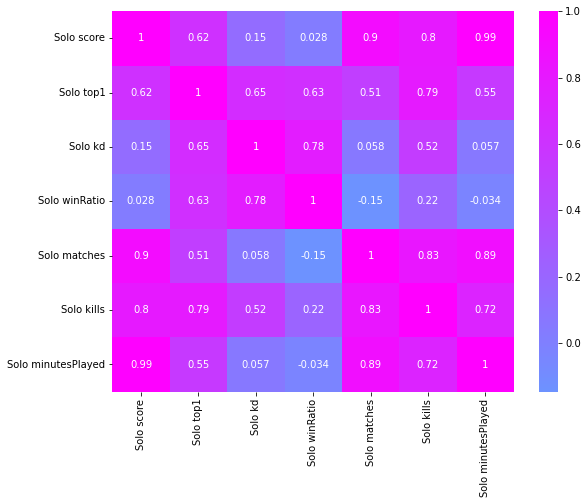

In [96]:
correlation_matrix = solo_player_data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(correlation_matrix, center=0, cmap='cool', robust=True, annot=True)



As we can see above, several variable show high degree of correlation with one another. 

- "Solo score" is highly correlated with "Solo minutesPlayed", "Solo matches", and "Solo top1". The fact that "Solo score" doesn't show much correlation with "Solo winRatio" and "Solo kd", and that it shows high correlation with "Solo minutesPlayed" may suggests that "Solo score" may not be a good indicator of player skill level. More time playing the game may lead to a higher cumulative solo score but not always to more skill in the game.  

- "Solo top1" shows a high degree of correlation with all of the other variables. This shows that it could be a decisive variable for distinguishing player skill level. The players with lots of wins tend to also have high levels all of the other player stats so it reasonable to assume that these must also be the best players.

- "Solo winRatio" only shows significant correlation with "Solo kd" and "Solo top1". The correlation with "Solo top1" is obvious, in order to have a high "Solo winRatio" you must win a lot of games. The correlation with "Solo kd" might be best explained by the negative correlation that "Solo winRatio" has with "Solo minutesPlayed" and it's low correlation with "Solo matches". Players with high "Solo winRatio's" may not have played the game enough accumulate enough losses to offset their win early on. This suggests that gaining skill also requires losing a lot of matches. 